<a href="https://colab.research.google.com/github/arunguna06/arunguna06/blob/main/Pull_back_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance


     |████████████████████████████████| 6.4 MB 4.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import yfinance as yf
df = yf.download("RELIANCE.NS", start="2000-01-01", end="2022-02-24")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,36.747459,38.944569,36.747459,38.944569,29.773567,28802010
2000-01-04,39.981236,42.062302,38.882679,42.062302,32.157108,61320457
2000-01-05,39.710464,44.545658,39.710464,43.710136,33.416897,173426953
2000-01-06,44.715855,46.526150,44.715855,45.543640,34.818634,101355113
2000-01-07,45.644211,49.187443,45.334759,48.669109,37.208084,128426756
...,...,...,...,...,...,...
2022-02-17,2420.100098,2454.899902,2410.000000,2443.500000,2443.500000,5931774
2022-02-18,2444.399902,2456.399902,2420.149902,2424.399902,2424.399902,3126873
2022-02-21,2412.000000,2437.500000,2384.600098,2399.899902,2399.899902,5125968


Calculating the 200 day Moving Average

In [ ]:
df["200MA"] = df["Adj Close"].rolling(window=200).mean()
df

,Open,High,Low,Close,Adj Close,Volume,200MA
Date,,,,,,,
2000-01-03,36.747459,38.944569,36.747459,38.944569,29.773567,28802010,NaN
2000-01-04,39.981236,42.062302,38.882679,42.062302,32.157108,61320457,NaN
2000-01-05,39.710464,44.545658,39.710464,43.710136,33.416897,173426953,NaN
2000-01-06,44.715855,46.526150,44.715855,45.543640,34.818634,101355113,NaN
2000-01-07,45.644211,49.187443,45.334759,48.669109,37.208084,128426756,NaN
...,...,...,...,...,...,...,...
2022-02-17,2420.100098,2454.899902,2410.000000,2443.500000,2443.500000,5931774,2313.112678
2022-02-18,2444.399902,2456.399902,2420.149902,2424.399902,2424.399902,3126873,2315.682406
2022-02-21,2412.000000,2437.500000,2384.600098,2399.899902,2399.899902,5125968,2318.112191


Dropping Nan Values


In [ ]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,200MA
Date,,,,,,,
2000-10-06,52.305172,52.885395,52.073086,52.668777,41.137260,13474626,39.142566
2000-10-09,52.761616,53.612610,52.459900,52.676517,41.143311,15937739,39.199415
2000-10-10,52.769352,52.838978,51.585697,51.864204,40.508842,13848357,39.241173
2000-10-11,51.523808,51.740421,50.688286,51.106045,39.916672,12546690,39.273672
2000-10-12,50.672813,51.755894,49.906918,50.649605,39.560181,31881405,39.297380
...,...,...,...,...,...,...,...
2022-02-17,2420.100098,2454.899902,2410.000000,2443.500000,2443.500000,5931774,2313.112678
2022-02-18,2444.399902,2456.399902,2420.149902,2424.399902,2424.399902,3126873,2315.682406
2022-02-21,2412.000000,2437.500000,2384.600098,2399.899902,2399.899902,5125968,2318.112191


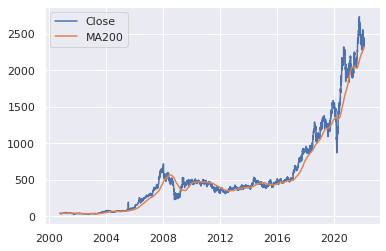

In [ ]:
plt.plot(df["Adj Close"], label="Close")
plt.plot(df["200MA"], label="MA200")
plt.legend()
plt.show()

Calculating the price change to calculate RSI

In [ ]:
df["price change"] = df["Adj Close"].pct_change()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,200MA,price change
Date,,,,,,,,
2000-10-06,52.305172,52.885395,52.073086,52.668777,41.137260,13474626,39.142566,NaN
2000-10-09,52.761616,53.612610,52.459900,52.676517,41.143311,15937739,39.199415,0.000147
2000-10-10,52.769352,52.838978,51.585697,51.864204,40.508842,13848357,39.241173,-0.015421
2000-10-11,51.523808,51.740421,50.688286,51.106045,39.916672,12546690,39.273672,-0.014618
2000-10-12,50.672813,51.755894,49.906918,50.649605,39.560181,31881405,39.297380,-0.008931
...,...,...,...,...,...,...,...,...
2022-02-17,2420.100098,2454.899902,2410.000000,2443.500000,2443.500000,5931774,2313.112678,0.012661
2022-02-18,2444.399902,2456.399902,2420.149902,2424.399902,2424.399902,3126873,2315.682406,-0.007817
2022-02-21,2412.000000,2437.500000,2384.600098,2399.899902,2399.899902,5125968,2318.112191,-0.010106


In [ ]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,200MA,price change
Date,,,,,,,,
2000-10-09,52.761616,53.612610,52.459900,52.676517,41.143311,15937739,39.199415,0.000147
2000-10-10,52.769352,52.838978,51.585697,51.864204,40.508842,13848357,39.241173,-0.015421
2000-10-11,51.523808,51.740421,50.688286,51.106045,39.916672,12546690,39.273672,-0.014618
2000-10-12,50.672813,51.755894,49.906918,50.649605,39.560181,31881405,39.297380,-0.008931
2000-10-13,50.324677,50.324677,47.206947,49.249332,38.466480,24689867,39.303672,-0.027646
...,...,...,...,...,...,...,...,...
2022-02-17,2420.100098,2454.899902,2410.000000,2443.500000,2443.500000,5931774,2313.112678,0.012661
2022-02-18,2444.399902,2456.399902,2420.149902,2424.399902,2424.399902,3126873,2315.682406,-0.007817
2022-02-21,2412.000000,2437.500000,2384.600098,2399.899902,2399.899902,5125968,2318.112191,-0.010106


Calculating Upmove and downmove

In [ ]:
df["uptrend"] = df["price change"].apply(lambda x: x if x> 0 else 0)
df["downtrend"] = df["price change"].apply(lambda x: abs(x) if x < 0 else 0) 
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Adj Close,Volume,200MA,price change,uptrend,downtrend
Date,,,,,,,,,,
2000-10-09,52.761616,53.612610,52.459900,52.676517,41.143311,15937739,39.199415,0.000147,0.000147,0.000000
2000-10-10,52.769352,52.838978,51.585697,51.864204,40.508842,13848357,39.241173,-0.015421,0.000000,0.015421
2000-10-11,51.523808,51.740421,50.688286,51.106045,39.916672,12546690,39.273672,-0.014618,0.000000,0.014618
2000-10-12,50.672813,51.755894,49.906918,50.649605,39.560181,31881405,39.297380,-0.008931,0.000000,0.008931
2000-10-13,50.324677,50.324677,47.206947,49.249332,38.466480,24689867,39.303672,-0.027646,0.000000,0.027646
...,...,...,...,...,...,...,...,...,...,...
2022-02-17,2420.100098,2454.899902,2410.000000,2443.500000,2443.500000,5931774,2313.112678,0.012661,0.012661,0.000000
2022-02-18,2444.399902,2456.399902,2420.149902,2424.399902,2424.399902,3126873,2315.682406,-0.007817,0.000000,0.007817
2022-02-21,2412.000000,2437.500000,2384.600098,2399.899902,2399.899902,5125968,2318.112191,-0.010106,0.000000,0.010106


Finding EMA (wilder smoothening method) 


In [ ]:
df["avg gain"] = df["uptrend"].ewm(span=19).mean()
df["avg loss"] = df["downtrend"].ewm(span=19).mean()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Adj Close,Volume,200MA,price change,uptrend,downtrend,avg gain,avg loss
Date,,,,,,,,,,,,
2000-10-09,52.761616,53.612610,52.459900,52.676517,41.143311,15937739,39.199415,0.000147,0.000147,0.000000,0.000147,0.000000
2000-10-10,52.769352,52.838978,51.585697,51.864204,40.508842,13848357,39.241173,-0.015421,0.000000,0.015421,0.000070,0.008116
2000-10-11,51.523808,51.740421,50.688286,51.106045,39.916672,12546690,39.273672,-0.014618,0.000000,0.014618,0.000044,0.010516
2000-10-12,50.672813,51.755894,49.906918,50.649605,39.560181,31881405,39.297380,-0.008931,0.000000,0.008931,0.000031,0.010055
2000-10-13,50.324677,50.324677,47.206947,49.249332,38.466480,24689867,39.303672,-0.027646,0.000000,0.027646,0.000024,0.014351
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,2420.100098,2454.899902,2410.000000,2443.500000,2443.500000,5931774,2313.112678,0.012661,0.012661,0.000000,0.006779,0.004389
2022-02-18,2444.399902,2456.399902,2420.149902,2424.399902,2424.399902,3126873,2315.682406,-0.007817,0.000000,0.007817,0.006102,0.004732
2022-02-21,2412.000000,2437.500000,2384.600098,2399.899902,2399.899902,5125968,2318.112191,-0.010106,0.000000,0.010106,0.005491,0.005269


Calculating Relative Strength


In [ ]:
df["RS"] = df["avg gain"]/df["avg loss"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Calculating RSI


In [ ]:
df["RSI"] = df["RS"].apply(lambda x: 100 - (100/(x+1)))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,200MA,price change,uptrend,downtrend,avg gain,avg loss,RS,RSI
Date,,,,,,,,,,,,,,
2000-10-09,52.761616,53.612610,52.459900,52.676517,41.143311,15937739,39.199415,0.000147,0.000147,0.000000,0.000147,0.000000,inf,100.000000
2000-10-10,52.769352,52.838978,51.585697,51.864204,40.508842,13848357,39.241173,-0.015421,0.000000,0.015421,0.000070,0.008116,0.008583,0.851036
2000-10-11,51.523808,51.740421,50.688286,51.106045,39.916672,12546690,39.273672,-0.014618,0.000000,0.014618,0.000044,0.010516,0.004180,0.416294
2000-10-12,50.672813,51.755894,49.906918,50.649605,39.560181,31881405,39.297380,-0.008931,0.000000,0.008931,0.000031,0.010055,0.003101,0.309106
2000-10-13,50.324677,50.324677,47.206947,49.249332,38.466480,24689867,39.303672,-0.027646,0.000000,0.027646,0.000024,0.014351,0.001642,0.163928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,2420.100098,2454.899902,2410.000000,2443.500000,2443.500000,5931774,2313.112678,0.012661,0.012661,0.000000,0.006779,0.004389,1.544530,60.700004
2022-02-18,2444.399902,2456.399902,2420.149902,2424.399902,2424.399902,3126873,2315.682406,-0.007817,0.000000,0.007817,0.006102,0.004732,1.289397,56.320372
2022-02-21,2412.000000,2437.500000,2384.600098,2399.899902,2399.899902,5125968,2318.112191,-0.010106,0.000000,0.010106,0.005491,0.005269,1.042120,51.031276


Defining Buying Signals 

In [ ]:
df.loc[(df["Adj Close"] > df["200MA"]) & (df["RSI"] < 30), "Buy"] = "Yes"
df.loc[(df["Adj Close"] < df["200MA"]) | (df["RSI"] > 30), "Buy"] = "No"
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Open,High,Low,Close,Adj Close,Volume,200MA,price change,uptrend,downtrend,avg gain,avg loss,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2000-10-09,52.761616,53.612610,52.459900,52.676517,41.143311,15937739,39.199415,0.000147,0.000147,0.000000,0.000147,0.000000,inf,100.000000,No
2000-10-10,52.769352,52.838978,51.585697,51.864204,40.508842,13848357,39.241173,-0.015421,0.000000,0.015421,0.000070,0.008116,0.008583,0.851036,Yes
2000-10-11,51.523808,51.740421,50.688286,51.106045,39.916672,12546690,39.273672,-0.014618,0.000000,0.014618,0.000044,0.010516,0.004180,0.416294,Yes
2000-10-12,50.672813,51.755894,49.906918,50.649605,39.560181,31881405,39.297380,-0.008931,0.000000,0.008931,0.000031,0.010055,0.003101,0.309106,Yes
2000-10-13,50.324677,50.324677,47.206947,49.249332,38.466480,24689867,39.303672,-0.027646,0.000000,0.027646,0.000024,0.014351,0.001642,0.163928,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,2420.100098,2454.899902,2410.000000,2443.500000,2443.500000,5931774,2313.112678,0.012661,0.012661,0.000000,0.006779,0.004389,1.544530,60.700004,No
2022-02-18,2444.399902,2456.399902,2420.149902,2424.399902,2424.399902,3126873,2315.682406,-0.007817,0.000000,0.007817,0.006102,0.004732,1.289397,56.320372,No
2022-02-21,2412.000000,2437.500000,2384.600098,2399.899902,2399.899902,5125968,2318.112191,-0.010106,0.000000,0.010106,0.005491,0.005269,1.042120,51.031276,No


In [ ]:
profit_loss = []
for i in range(len(df) - 12):
  if "Yes" in df["Buy"].iloc[i]:
    for j in range(1,11):
      if df["RSI"].iloc[i + j] > 40:
        profit_loss.append(df["Open"].iloc[i+j+1]-df["Open"].iloc[i+1])
        break
      if df["RSI"].iloc[i+j] < 40:
        profit_loss.append(df["Open"].iloc[i+12] - df["Open"].iloc[i+1])
        break


In [ ]:
profit_loss

[-3.8758926391601562,
 -3.1796226501464844,
 -3.2105636596679688,
 -0.8045768737792969,
 1.7329330444335938,
 3.156414031982422,
 7.736305236816406,
 10.351181030273438,
 10.962348937988281,
 8.974113464355469,
 9.268096923828125,
 0.46417999267578125,
 -0.673065185546875,
 0.6189041137695312,
 2.7850723266601562,
 25.508209228515625,
 11.39202880859375,
 51.425048828125,
 24.7652587890625,
 80.2393798828125,
 48.86181640625,
 31.2042236328125,
 59.91949462890625,
 61.603546142578125,
 5.052093505859375,
 3.046142578125,
 9.286956787109375,
 26.25115966796875,
 27.365631103515625,
 36.92498779296875,
 30.48602294921875,
 32.69012451171875,
 0.866790771484375,
 17.5338134765625,
 22.065826416015625,
 -35.661956787109375,
 12.75408935546875,
 0.619140625,
 -1.163970947265625,
 -13.8685302734375,
 -17.657623291015625,
 -23.254547119140625,
 4.1605224609375,
 51.85845947265625,
 -46.31103515625,
 24.6661376953125,
 40.714111328125,
 71.4229736328125,
 71.224853515625,
 83.70654296875,
 35.

In [ ]:
Profits = []
Loss = []
for x in profit_loss:
  if x > 0:
    Profits.append(x)
  if x < 0:
    Loss.append(x)
len(Profits)


48

In [ ]:
Profits
Sum = sum(Profits)
Sum

1784.1364936828613

In [ ]:
print(len(Loss))
Loss
SUM_L = sum(Loss)
SUM_L

15


-287.96131134033203

In [ ]:
print(len(profit_loss))

63


In [ ]:
succcess_rate = len(Profits)/len(profit_loss)
print(succcess_rate)

0.7619047619047619


In [ ]:
print(df["Buy"] == "Yes")

Date
2000-10-09    False
2000-10-10     True
2000-10-11     True
2000-10-12     True
2000-10-13    False
              ...  
2022-02-17    False
2022-02-18    False
2022-02-21    False
2022-02-22    False
2022-02-23    False
Name: Buy, Length: 5334, dtype: bool


In [ ]:
new_df = df[df["Buy"] == "Yes"]



new_df["PL"] = np.array(profit_loss)


change = (new_df["PL"]/new_df["Open"]) * 100
new_df["ROI"] = change
print(new_df["ROI"].sum())


233.8580323183124


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Summary:
The strategy applied here is a pullback trading strategy.
The calculation i made was followed from a internet article which i have attached here:
https://www.macroption.com/rsi-calculation/ 

